# Upload Dataset to Colab

In [1]:
from google.colab import files
uploaded = files.upload()



Saving black_pepper_dataset_2000.csv to black_pepper_dataset_2000.csv


# Load the Dataset

In [2]:
import pandas as pd

df = pd.read_csv('black_pepper_dataset_2000.csv')
df.head()


,Crop,Temp_low(C),Temp_high(C),Rain_low(cm),Rain_high(cm),Humidity_low(%),Humidity_high(%),Elevation(m),Loamy,Fertile,Suitable
0,Black Pepper,20.2,29.8,20.7,38.0,70.8,80.6,999,0,0,1
1,Black Pepper,23.7,29.7,23.1,28.4,70.3,80.0,166,0,0,1
2,Black Pepper,22.4,34.3,22.6,42.4,61.4,77.6,401,1,1,1
3,Black Pepper,21.6,29.7,16.5,37.3,73.8,84.1,1172,1,0,1
4,Black Pepper,18.9,29.9,16.5,28.1,68.5,82.1,817,1,1,1


# Check Basic Info

In [8]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              2000 non-null   object 
 1   Temp_low(C)       2000 non-null   float64
 2   Temp_high(C)      2000 non-null   float64
 3   Rain_low(cm)      2000 non-null   float64
 4   Rain_high(cm)     2000 non-null   float64
 5   Humidity_low(%)   2000 non-null   float64
 6   Humidity_high(%)  2000 non-null   float64
 7   Elevation(m)      2000 non-null   int64  
 8   Loamy             2000 non-null   int64  
 9   Fertile           2000 non-null   int64  
 10  Suitable          2000 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 172.0+ KB


,0
Crop,0
Temp_low(C),0
Temp_high(C),0
Rain_low(cm),0
Rain_high(cm),0
Humidity_low(%),0
Humidity_high(%),0
Elevation(m),0
Loamy,0
Fertile,0


# Split Features and Target

In [4]:
X = df.drop('Suitable', axis=1)   # input features
y = df['Suitable']                # target column


# Train–Test Split

In [9]:
# @title
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the 'Crop' column as it is a string and not suitable for Logistic Regression
# and likely contains only one unique value, providing no predictive power.
X_train_processed = X_train.drop(columns=['Crop'])
X_test_processed = X_test.drop(columns=['Crop'])

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=2000)

# Choose ML Models
Start with Logistic Regression:

In [11]:
log_pred = log_model.predict(X_test_processed)

# Evaluate Model

In [12]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))



Logistic Regression Accuracy: 0.745
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.74      1.00      0.85       298

    accuracy                           0.74       400
   macro avg       0.37      0.50      0.43       400
weighted avg       0.56      0.74      0.64       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Make Predictions
With Example Input (custom soil & climate values)

In [14]:
sample_df = pd.DataFrame([
    {
        "Temp_low(C)": 20,
        "Temp_high(C)": 28,
        "Rain_low(cm)": 150,
        "Rain_high(cm)": 300,
        "Humidity_low(%)": 60,
        "Humidity_high(%)": 85,
        "Elevation(m)": 500,
        "Loamy": 1,
        "Fertile": 1
    }
])

log_model.predict(sample_df)

array([1])

In [16]:
print(list(zip(X_train_processed.columns, log_model.coef_[0])))
log_model.predict_proba(sample_df)

[('Temp_low(C)', np.float64(-0.060933955290343816)), ('Temp_high(C)', np.float64(0.044375406864973564)), ('Rain_low(cm)', np.float64(0.014300821187101713)), ('Rain_high(cm)', np.float64(0.011398321804180616)), ('Humidity_low(%)', np.float64(0.013829892022444508)), ('Humidity_high(%)', np.float64(0.003943339314697588)), ('Elevation(m)', np.float64(4.746053598923311e-05)), ('Loamy', np.float64(-0.033961010606577885)), ('Fertile', np.float64(-0.1236537386495894))]


array([[0.00285453, 0.99714547]])

# Visualization (Colab plots)

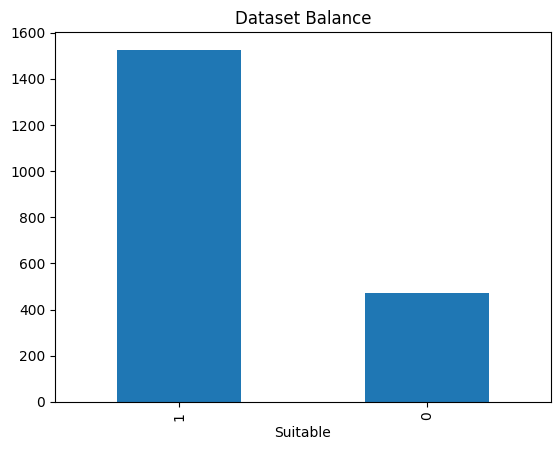

In [17]:
import matplotlib.pyplot as plt

df['Suitable'].value_counts().plot(kind='bar')
plt.title("Dataset Balance")
plt.show()


# Feature Importance

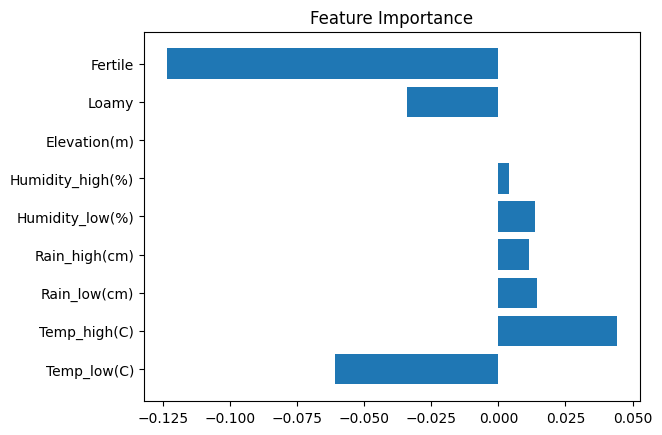

In [19]:
import numpy as np
import matplotlib.pyplot as plt

importances = log_model.coef_[0]
features = X_train_processed.columns # Corrected: Use columns from the processed training data

plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

In [24]:
import joblib
joblib.dump(log_model, "log_bp_model.pkl")

['log_bp_model.pkl']

In [26]:
files.download("log_bp_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>